# Snakemake End-To-End Tutorial

Hello, and welcome to the end-to-end tutorial! In this notebook, we will explore the workflow as a pipeline stitched together using the Snakemake software. By the end of the tutorial, you will be able to run the same workflow explored in the previous notebooks using just one command on your terminal. Although this seems ambitious, it is quite possible using Snakemake. Here are the steps we will review:

- About Snakemake
- Set up the project directory
- Set up virtual environment
- Set up repository and installations
- Review the Snakefile
- Run pipeline using Snakemake
- Additional features

Note that this tutorial assumes that you have already completed the pipeline notebook series. If not, you must download the toy data set and change the config files to reflect the new location of your data. This notebook is estimated to take just under 30 minutes to complete.

## About Snakemake

[Snakemake](https://snakemake.readthedocs.io/en/stable/) is a workflow management software that allows users to build pipelines that can be represented using directed acyclic graphs.

The basic workflow unit of Snakemake is a `rule`, defined most simply by an input, an output, and a shell command or script used to translate the input into the output. Every Snakemake project requires one `Snakefile`, which contains all of the rules for the project. By design, Snakemake will only run the first rule specified in the Snakefile. If an input to this first rule does not already exist in the project space, Snakemake will refer to other rules in the Snakefile in order to determine which sequence of rules must be run in order to produce the missing input. Given this design structure, before executing the workflow, Snakemake is able to build a directed acyclic graph in order to determine the order of the rules and any concurrencies that may persist in the pipeline (i.e. rules may be run simultaneously, rather than sequentially, if their inputs and outputs do not rely on one another). This greatly saves time in the execution process. Moreover, with this design system, it becomes quite easy to only execute part of a workflow instead of the entire process.

## Set up the project directory

Because you have already completed the step-by-step pipeline project in the `PRO-12-123` directory, we will demonstrate how to complete it in an entirely new directory called `snakemake`.

In [74]:
%%bash

mkdir snakemake
cd snakemake
mkdir outputs
mkdir logs
mkdir model
mkdir data
mkdir model/outputs
cp -r ../configs/snakemake-configs/scripts scripts

We will use slightly modified config files for this project. Note that these configs are nearly identical to the ones that you previously used for the pipeline, but certain output destinations are modified to redirect to the snakemake folder. These new configs can be found in the `configs/snakemake-configs` folder.

We will also copy the toy dataset into this new project space.

In [75]:
%%bash

cp -r PRO-12-123/data/toy_data_set snakemake/data/snakemake_toy_data_set

## Set up virtual environment

It is critical to note that one is not able to do a full installation of the Snakemake software on Windows (for reference: https://snakemake.readthedocs.io/en/stable/getting_started/installation.html). We will install Snakemake with a minimal installation using pip.

The following cell will create and activate your virtual environment, upgrade the pip package manager, and register your virtual environment with JupyterLab. These steps were taken directly from the `setup.ipynb` notebook.

Open a terminal in your Jupyter Lab environment by selecting File -> New -> Terminal and execute the following commands. It is assumed that your default python environment on the host system has python3-venv installed (sudo apt-get install python3-venv -y).

Now, apply the new kernel to your notebook by first selecting the default kernel (which is typically "Python 3") and then selecting your new kernel "venv-snakemake" from the drop-down list. **NOTE:** It may take a minute for the drop-down list to update. You may refresh the browser instead. 

Any python packages you pip install through the jupyter environment will now persist only in this environment.

## Set up repository and installations

At this point, make sure that you are in the new virtual environment that you just set up. You should see the name of the environment in parenthesis on the left-hand side of your command line prompt. Still in your terminal, you must clone into the repository and copy the `classifier` folder as well as the `Snakefile` into the repository. To do so, run the following commands:

In [76]:
%%bash

cd snakemake
git clone https://github.com/msk-mind/data-processing.git 
cp ../configs/snakemake-configs/Snakefile data-processing/Snakefile
cp -r ../classifier data-processing/classifier

Cloning into 'data-processing'...


Checking out files: 100% (615/615), done.


Finally, you must install the dependencies required by the classifier code and the repository. Run the following in your terminal:

Lastly, we will set some environment variables to ensure that this project will run smoothly. Still in your terminal, run:

At this point, you should have all the necessary installations and setup within your project space. You are ready to review the Snakefile!

## Review the Snakefile

Before running the Snakemake software, it would be useful to review the contents of the Snakefile. Note that the first rule of the Snakefile, which is by design the only rule that Snakemake will run on, is titled `rule all`. The Snakemake software will attempt to create every input necessary for this rule in order to execute the workflow. In this case, we only have one two inputs: `../outputs/visualize_tiles.done` and `../outputs/infer_tiles.done`. This is because these are the two tasks that we wish to accomplish at the end of our pipeline. Snakemake will search for ways to produce these inputs given the other rules in the Snakefile.

The subsequent rules should look very familiar to you if you completed the full end-to-end notebook series. Each of the steps in the pipeline appear as rules in this Snakefile, with a few modifications. Sometimes, shell commands are run to translate inputs into outputs; other times, python scripts are run instead. Each rule creates a file entitled `../outputs/rule.done` to signify the completion of the rule.

Note that the `update_patient_ids` rule associates spoof id's to each of the slides. If you intend to run a different analysis using the Snakemake pipeline, be sure to update this rule to include a script that associates your slides with the correct patient ids for your research.

In order to get an idea for what will happen when you run the software, we will execute a "dry run" of our project. In your terminal, navigate to the `data-processing` folder that you just cloned (the folder in which the Snakefile is located) and run the following command:

In [77]:
!cd snakemake/data-processing && snakemake -np

Building DAG of jobs...
Job stats:
job                     count    min threads    max threads
--------------------  -------  -------------  -------------
all                         1              1              1
collect_tiles_train         1              1              1
generate_tiles_test         1              1              1
generate_tiles_train        1              1              1
infer_tiles                 1              1              1
load_slides                 1              1              1
train_model                 1              1              1
update_patient_ids          1              1              1
visualize_tiles             1              1              1
total                       9              1              1


[Tue Aug 10 09:34:34 2021]
rule update_patient_ids:
    input: /gpfs/mskmindhdp_emc/user/shared_data_folder/pathology-tutorial/configs/snakemake-configs/project_slides.csv
    output: ../outputs/update_patient_ids.done
    log: ../logs/update_

You should see a series of rules that rely on one another; the order of the rules should be reminiscent of the order of these steps in the full end-to-end notebook series that you completed. To see these rules represented as an acyclic graph, run the following command in the terminal:

To create the directed acyclic graph directly from the notebook, run the following command:

In [78]:
import graphviz
import snakemake

!cd snakemake/data-processing/ && snakemake --dag --cores 1 | dot -Tsvg > ../dag.svg

Building DAG of jobs...


Let's take a look at what the directed acyclic graph for our pipeline looks like.

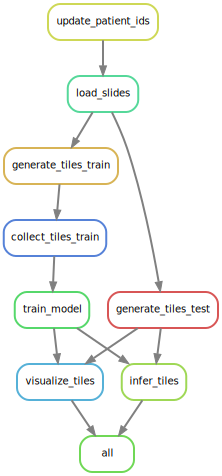

In [79]:
import IPython
from IPython.display import SVG, display

def show_svg():
    display(SVG('/gpfs/mskmindhdp_emc/user/shared_data_folder/pathology-tutorial/snakemake/dag.svg'))

show_svg()

You should be able to view this svg file in the root folder of the snakemake project space. Notice how the rules rely on one another!

## Run pipeline using Snakemake

At this point, you are ready to run the pipeline using Snakemake! In the `data-processing` folder in your terminal, run the following command. Note that a lot of output will appear as the software navigates through the rules. Moreover, this process should take just about twenty minutes to complete, as some steps are time-intensive, so be patient!

If you wish to run the pipeline in your terminal, navigate to your terminal and run the following command:

If you instead wish to run the pipeline in this notebook, first make sure that you are in the proper virtual environment (as visible in the top right of the notebook). Then, run the following shell:

In [ ]:
%%bash

export PYTHONPATH='/opt/spark-3.0.0-bin-hadoop3.2/python/'
cp -r classifier snakemake/scripts/classifier
cd snakemake/data-processing/
snakemake --cores 1

Congratulations, you now have the capability to run the entire tutorial from start to finish using just a single command! 

## Additional features

If you are interested in only running part of the pipeline, this section will explain how to do so.

To run the pipeline from start until a specific point, you may simply change the input to the `rule all` to `../outputs/your_desired_stopping_point.done`. If you wish to run from a certain point in the pipeline until the finish, you must edit the Snakefile further. Navigate to the earliest rule that you wish to include in your segmented pipeline. Change that rule's input file to a file that does not depend on other rules (for instance, "/gpfs/mskmindhdp_emc/user/shared_data_folder/pathology-tutorial/snakemake/data/snakemake_toy_data_set/" is a great input placeholder because this file path is sure to exist already). Now, the Snakemake software will not redo any computation before this point in your rules!

*A quick note: when you are running the same rule repeatedly, be sure to clear the project space occupied by that rule in between runs so that it does not become cluttered with outputs from older runs of that rule. You may do so manually or create a bash script to empty your folders for you!*

At this point, you have completed the Snakemake End-to-End Pipeline tutorial notebook! Congratulations!